# Customer Segmentation using Kmeans clustering

## Step 1: Import Dependencies

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 2: Import Data

In [2]:
# Import Data

df = pd.read_csv(r'Data\Mall_Customers.csv', index_col=0, header=0)
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


## Step 3: EDA

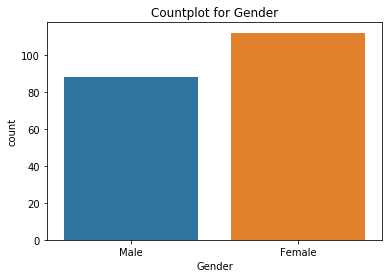

In [3]:
# count plot on single categorial variable
sns.countplot(x= 'Gender', data = df)
# Show the plot
plt.title("Countplot for Gender")
plt.show()

> Observation: The countplot reveals that females represent a higher count of customers compared to males, with 112 females and 88 males observed in the mall.

In [4]:
df["Gender"].value_counts() # use to count category values

Female    112
Male       88
Name: Gender, dtype: int64

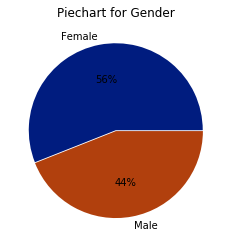

In [5]:
#Piechart

# declaring data
data = [112,88]
keys=['Female','Male']

#declaring exploding pie
explode = [0.01,0]

#define Seaborn color palette to use
palette_color  = sns.color_palette('dark')

#platting data on chart
plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%')

#displaying chart
plt.title("Piechart for Gender")
plt.show()

> Observation: Female count is 56%, while Male count is 44%. As we already discussed in counplot that Female count in mall is more than Male

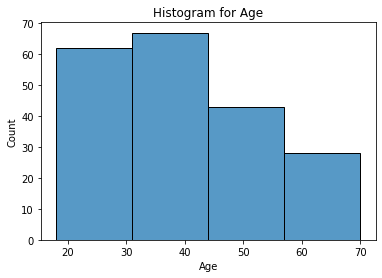

In [6]:
#plot histogram
# if plot didn't showed up, try updating seaborn lib
# pip install seaborn==0.11.2 in terminal
# restart and run all

sns.histplot(data =df,
             x = 'Age',
             bins=4,
             kde = False)

plt.title("Histogram for Age")
plt.show()

>Obervation: The histplot displaying the age-wise count of customers in the mall indicates that the age group between 20 and 40 has the highest spending activity, suggesting that this demographic contributes significantly to the mall's revenue.

In [7]:
sns.__version__ #check the version of seaborn lib

'0.11.2'

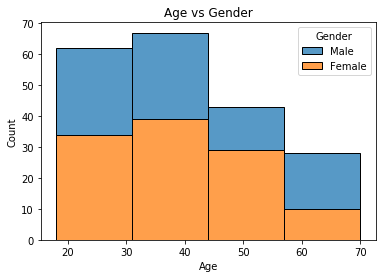

In [8]:
#Histplot of Age with respect to Gender

sns.histplot(data =df,
             x='Age',
             bins=4,
             hue='Gender',
             multiple='stack',
             kde=False)
plt.title("Age vs Gender")
plt.show()

>Observation: The histplot illustrating the age-wise count of customers based on gender reveals that the age group ranging from 20 to 55 shows a higher female presence in the mall, indicating that females in this age range contribute significantly to the overall customer base.

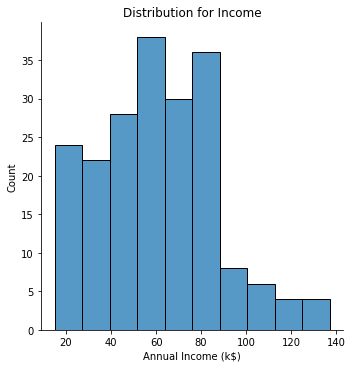

In [9]:
#Distplot of Annual Income

sns.displot(df, x = "Annual Income (k$)")

plt.title("Distribution for Income")
plt.show()

>Observation: the displot representing the count of customers based on their annual income in dollars indicates that a substantial number of customers in the mall fall within the annual income range of 20 to 85. This suggests that the mall attracts a diverse range of income groups, catering to a broad spectrum of spending capacities.

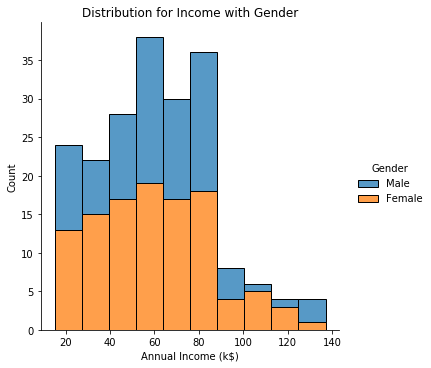

In [10]:
#Multi stack displot
#Displot of Annual Income with respect to Gender

sns.displot(df, x = "Annual Income (k$)", hue="Gender", multiple='stack')

plt.title("Distribution for Income with Gender")
plt.show()

>Observation: Both males and females show a high count in the annual income range of 20 to 85. This indicates that the mall attracts a significant number of customers from diverse income levels, regardless of gender, within this income bracket.

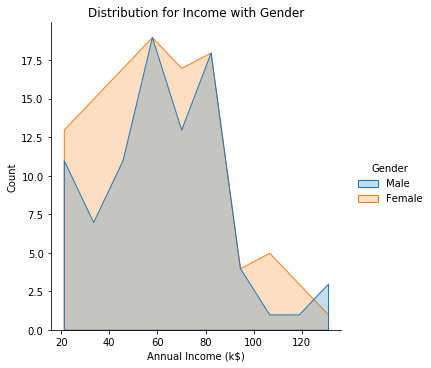

In [11]:
#Displot using element="poly"

sns.displot(df, x = "Annual Income (k$)", hue="Gender", element='poly')

plt.title("Distribution for Income with Gender")
plt.show()

>Obervation: Both males and females exhibit a high count in the annual income range of 20 to 85. Interestingly, within this income bracket, the age group of 45 to 85 stands out with the highest count, indicating that middle-aged and older customers contribute significantly to the mall's customer base and their purchasing power.

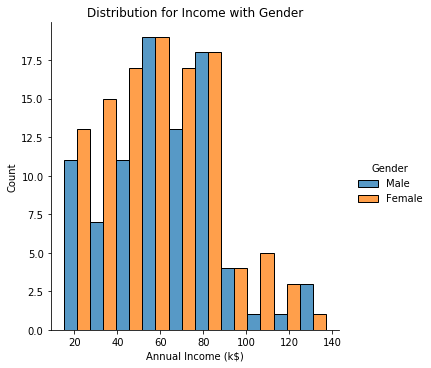

In [12]:
#Displot with multiple ='dodge'

sns.displot(df, x = "Annual Income (k$)", hue="Gender", multiple='dodge')

plt.title("Distribution for Income with Gender")
plt.show()

>Obervation: Both males and females exhibit a high count in the annual income range of 20 to 85. Interestingly, within this income bracket, the age group of 45 to 85 stands out with the highest count, indicating that middle-aged and older customers contribute significantly to the mall's customer base and their purchasing power.

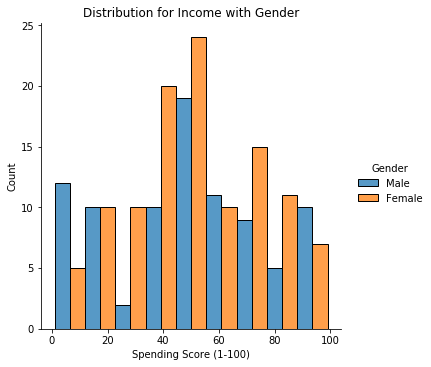

In [13]:
#Displot of Spending Score with respect to Gender

sns.displot(df, x = "Spending Score (1-100)", hue="Gender", multiple='dodge')

plt.title("Distribution for Income with Gender")
plt.show()

>Observation: The age group between 40 and 55 exhibits a notably high count, indicating that customers within this age range tend to have higher spending scores compared to other age groups. This suggests that individuals in the 40-55 age group are more likely to engage in higher levels of spending within the mall.

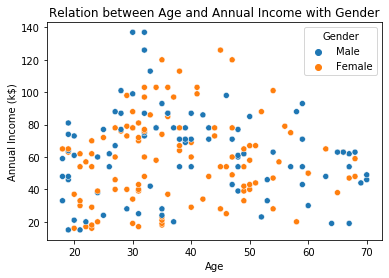

In [14]:
#Scatterplot of Age and Annual Income with respect to Gender

sns.scatterplot(data=df, x= 'Age', y= 'Annual Income (k$)', hue ='Gender')
plt.title('Relation between Age and Annual Income with Gender')
plt.show()                

>Obervation: Scatterplot shows that there is no significant relation between Age and Annual Income

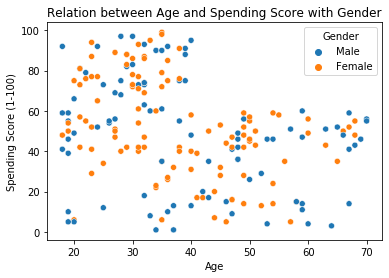

In [15]:
#Scatterplot of Age and Spending Score with respect to Gender

sns.scatterplot(data=df, x= 'Age', y= 'Spending Score (1-100)', hue ='Gender')
plt.title('Relation between Age and Spending Score with Gender')
plt.show() 

>Observation: Plot indicates that age group from 20 to 40 years has high spending behaviour, while age group from 40 to 70 years has significanlty low spending behaviour.

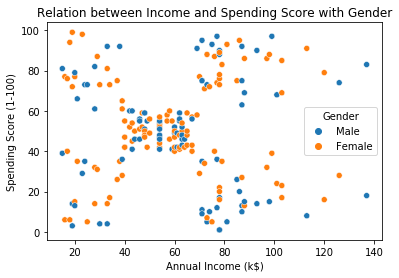

In [16]:
#Scatterplot of Annual Income and Spending Score with respect to Gender

sns.scatterplot(data=df, x= 'Annual Income (k$)', y= 'Spending Score (1-100)', hue ='Gender')
plt.title('Relation between Income and Spending Score with Gender')
plt.show() 

>Observation: 
    1. Annual Income high with High Spending Score: target and Loyal customer.
    2. Annual Income High with Low Spending Score: have buying capacity so needs to be targeted by giving offer and discount to increase their spending.
    3. Annual Income & Spending Score both Average: Average customers with decent buying capaacity.
    4. Annual Income Low with High Spending Score: from business perspertive good customer regardless of their Income.
    5. Annual Income Low with Low Spending Score: Random customer and can be focused audience

## Step 4: Data Preprocessing

In [17]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.8+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [18]:
df.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


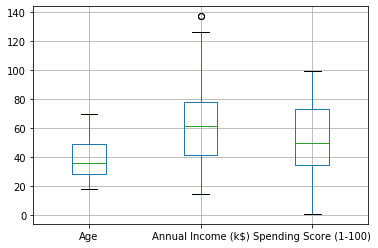

In [19]:
df.boxplot()
plt.show()

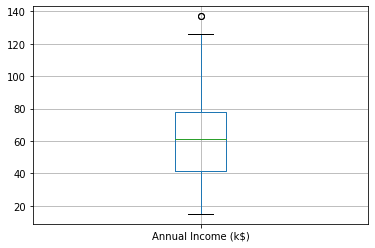

In [20]:
df.boxplot('Annual Income (k$)')
plt.show()

In [21]:
X = df.iloc[:,2:4]   # [ start_row : end_row , start_col : end_col ]

In [22]:
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [23]:
%%time

#using the elbow method to find the optimal numbers of clusters
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

K_MAX = 15
wsse = []
#progress bar
with tqdm(total=K_MAX-1) as pbar:
    for i in range(1, K_MAX):
        
        kmeans = KMeans(n_clusters=i, random_state=10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)



Wall time: 418 ms


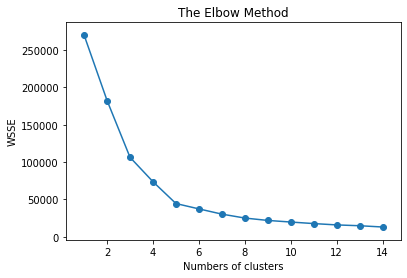

In [24]:
plt.plot(range(1, K_MAX), wsse)
plt.scatter(range(1, K_MAX), wsse)

plt.title('The Elbow Method')
plt.xlabel('Numbers of clusters')
plt.ylabel('WSSE')
plt.show()

In [25]:
print(wsse[4])

44448.45544793371


In [26]:
#fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, random_state= 10)
Y_pred = kmeans.fit_predict(X)

In [27]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [28]:
kmeans.n_iter_

3

In [29]:
df['Clusters']=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
6,Female,22,17,76,3
7,Female,35,18,6,2
8,Female,23,18,94,3
9,Male,64,19,3,2


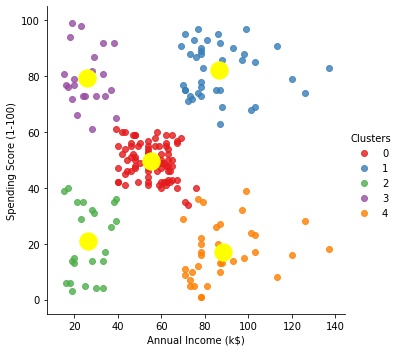

In [30]:
sns.lmplot(data = df,
           x = 'Annual Income (k$)',
           y = 'Spending Score (1-100)',
           fit_reg=False, #no regression line
           hue = 'Clusters',
           palette='Set1')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s= 300, c= 'yellow')
plt.show()

In [31]:
df['Clusters']=df.Clusters.map({0:'Sensible',1:"Target",2:"NotUseful",3:"Careless",4:"Careful"})

In [32]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,NotUseful
2,Male,21,15,81,Careless
3,Female,20,16,6,NotUseful
4,Female,23,16,77,Careless
5,Female,31,17,40,NotUseful


In [33]:
new_df=df[df['Clusters']=='Target']

In [34]:
new_df.shape

(39, 5)

In [35]:
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
124,Male,39,69,91,Target
126,Female,31,70,77,Target
128,Male,40,71,95,Target
130,Male,38,71,75,Target
132,Male,39,71,75,Target
134,Female,31,72,71,Target
136,Female,29,73,88,Target
138,Male,32,73,73,Target
140,Female,35,74,72,Target


In [36]:
df.to_csv(r'TargetCustomers.csv',index=True)